# FastCampus

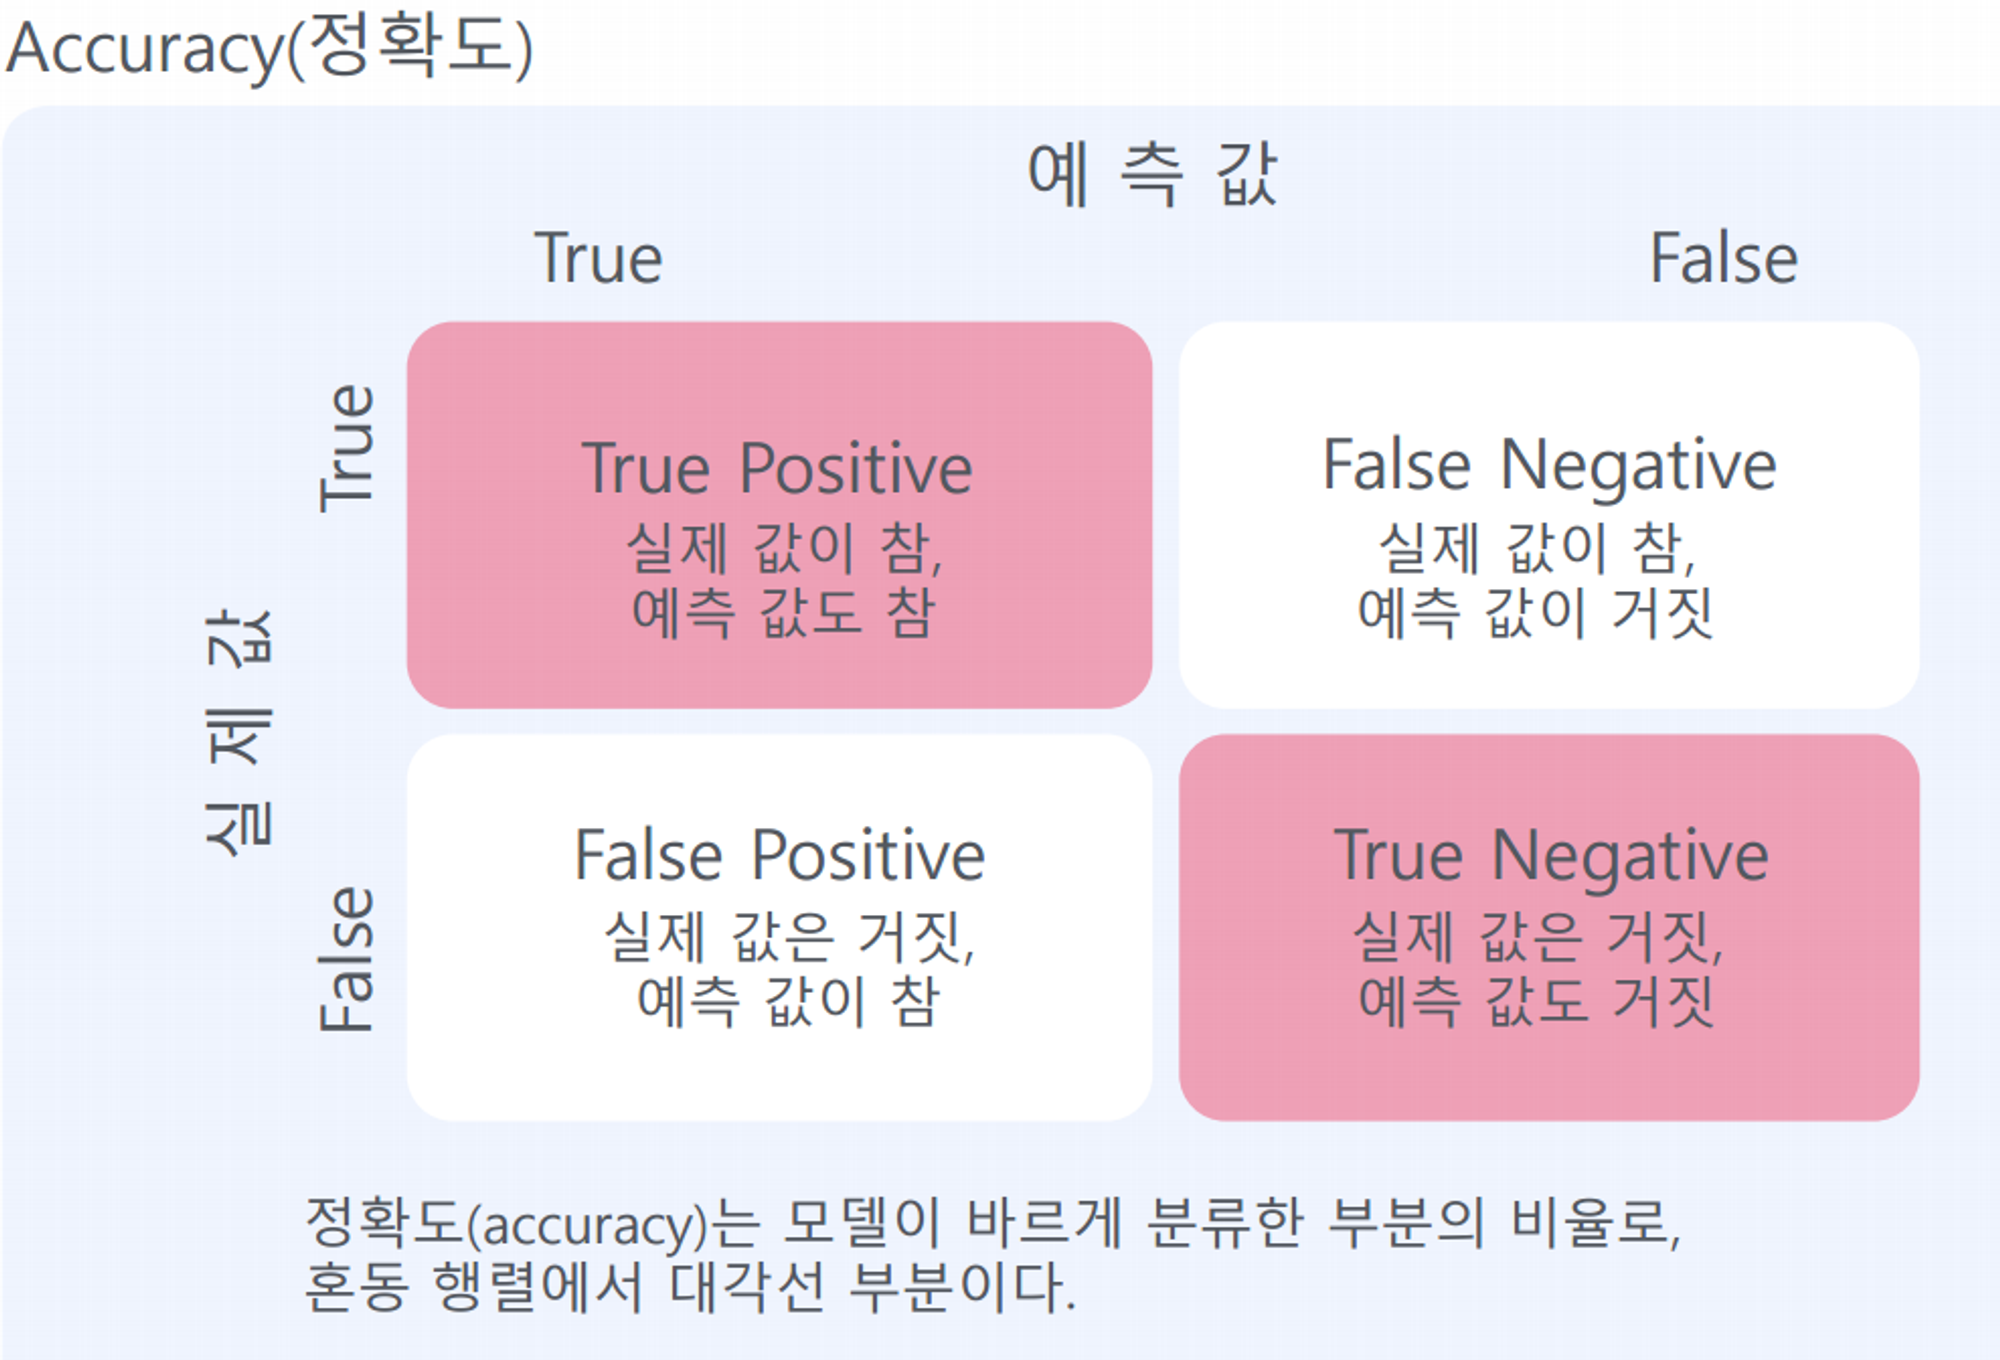

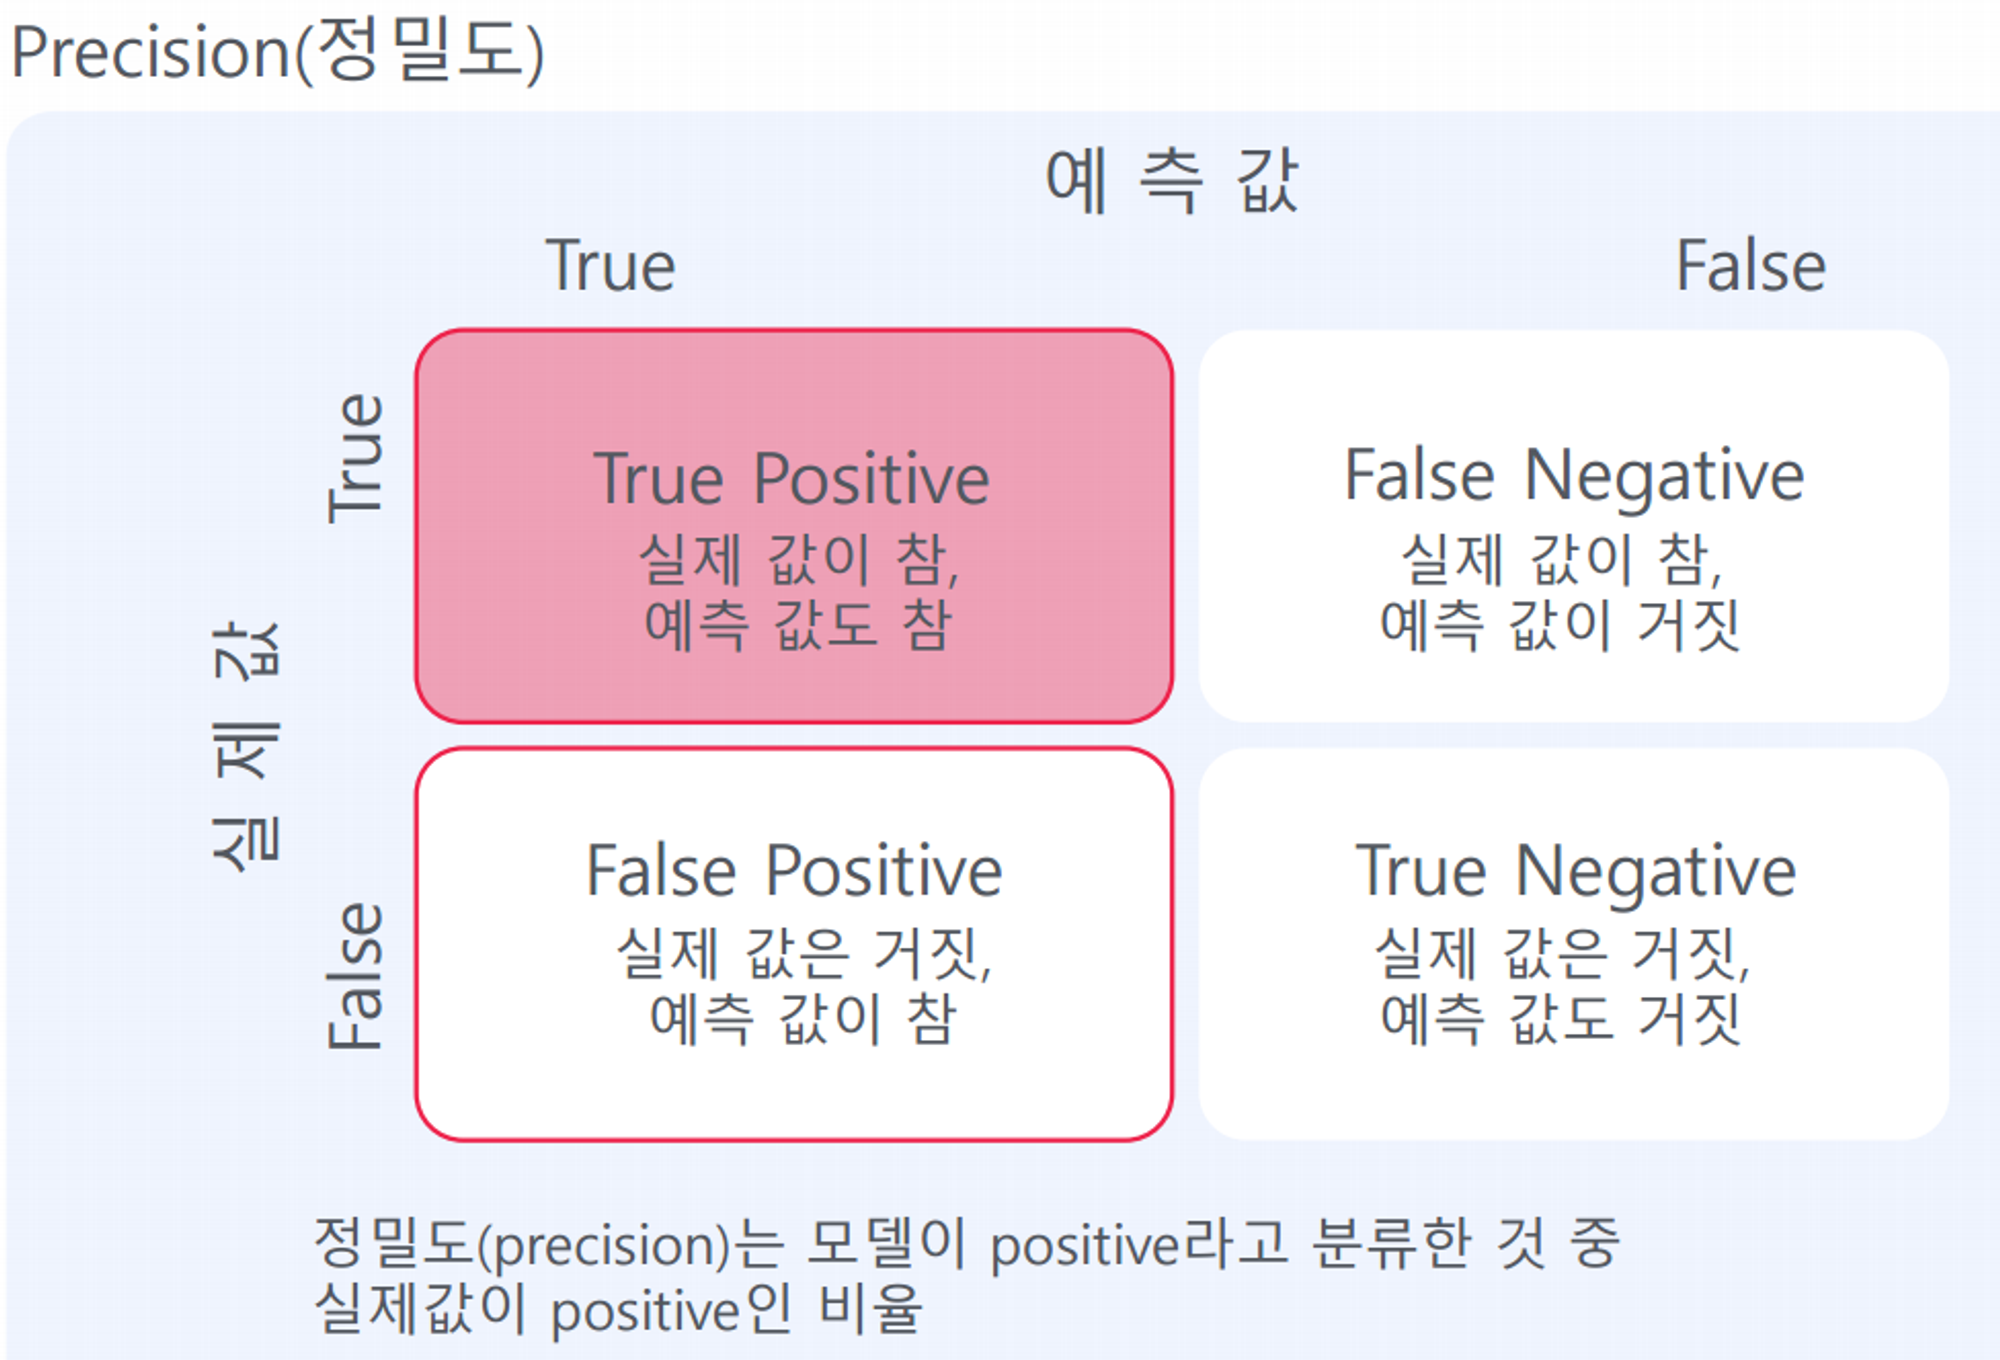

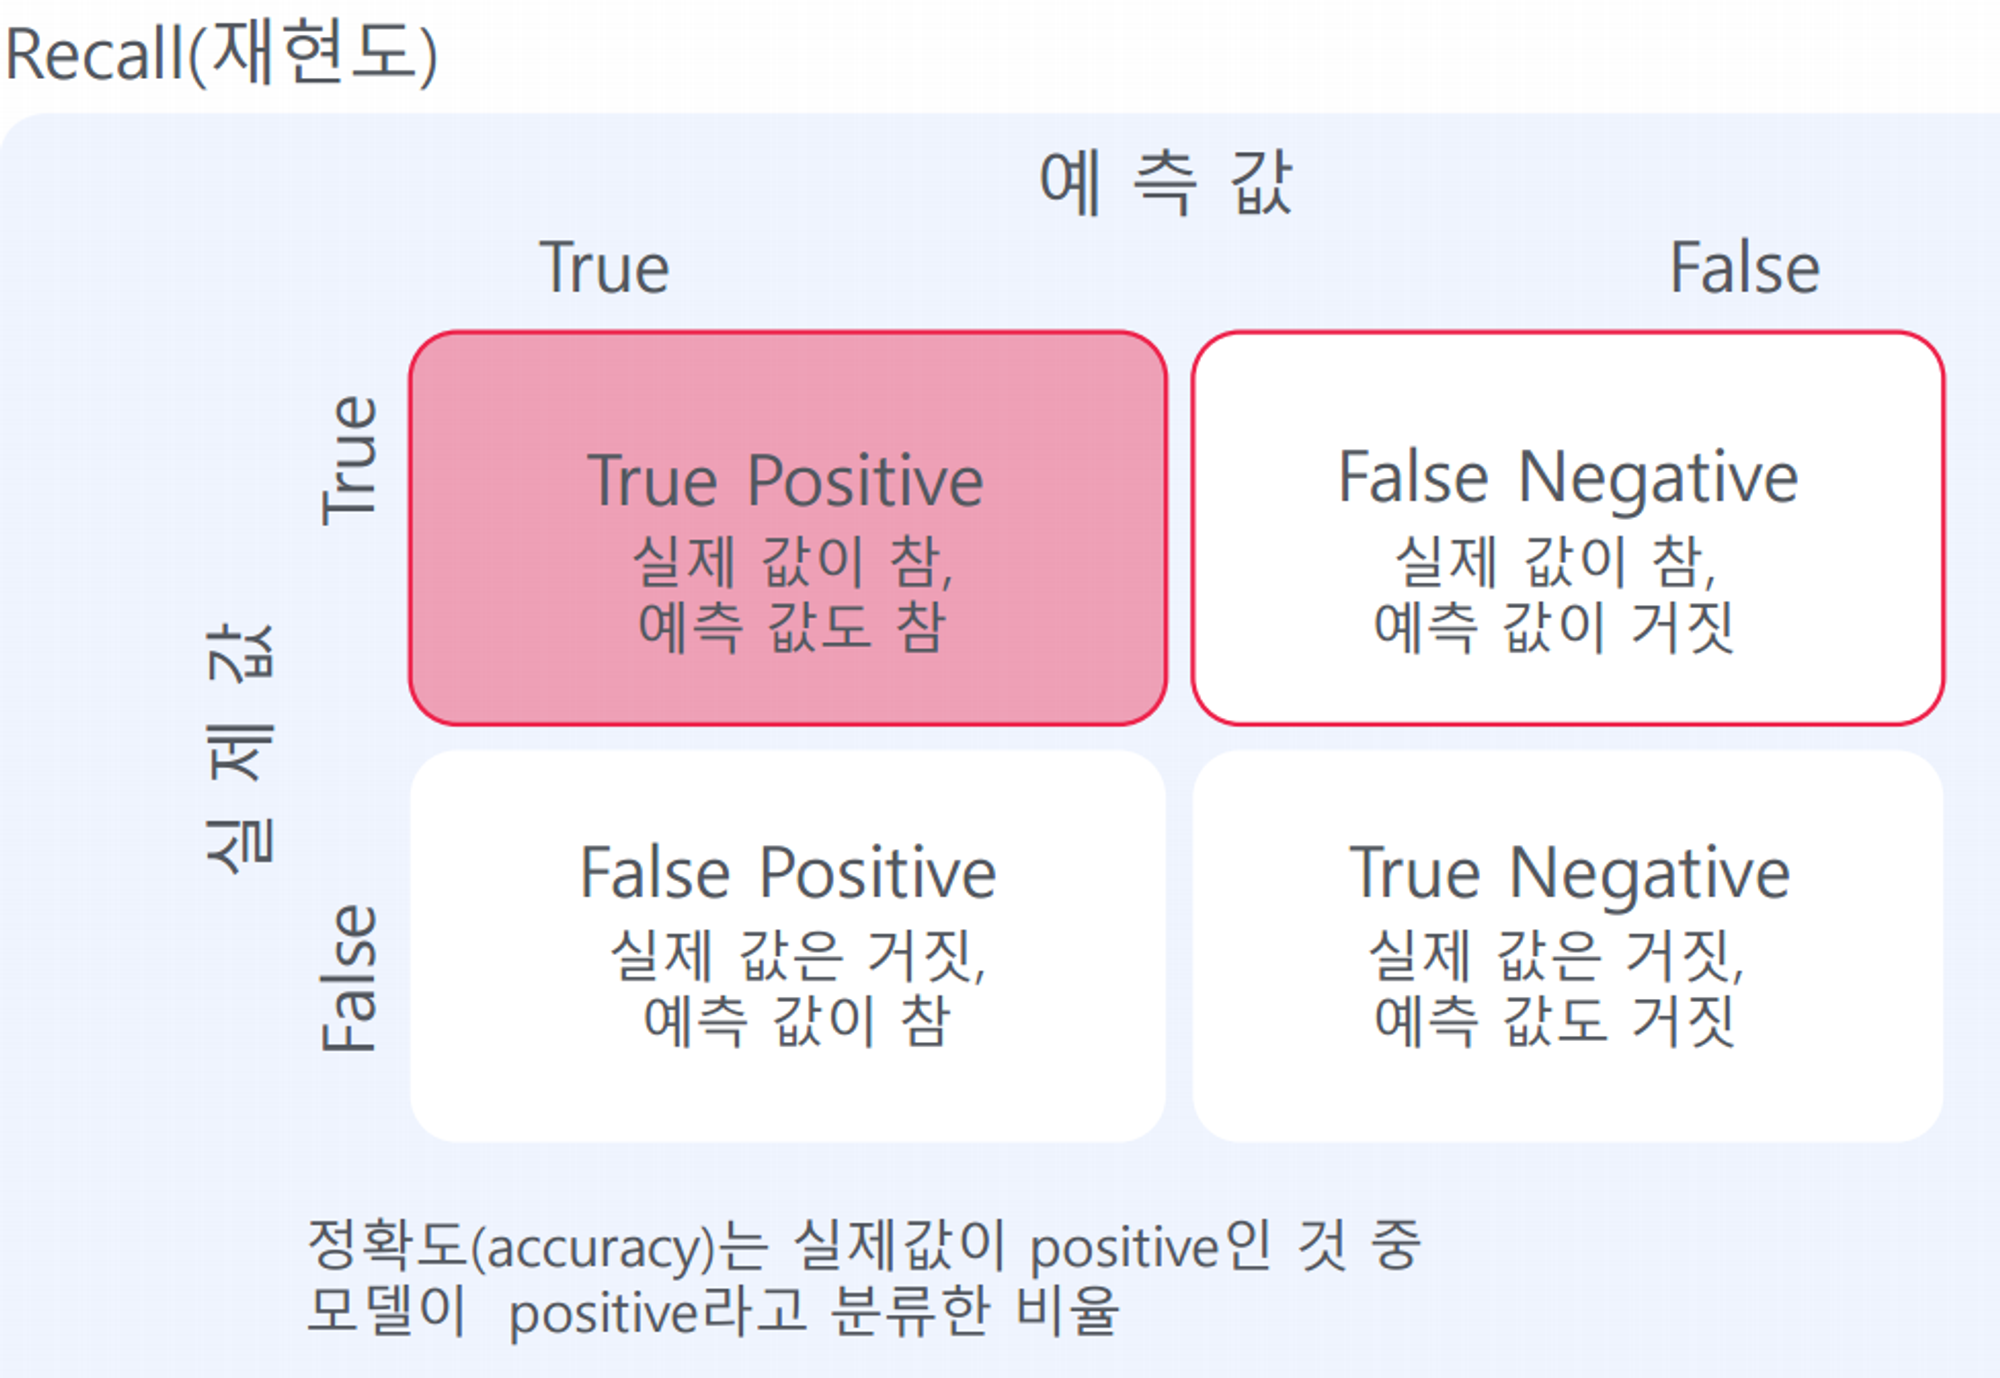

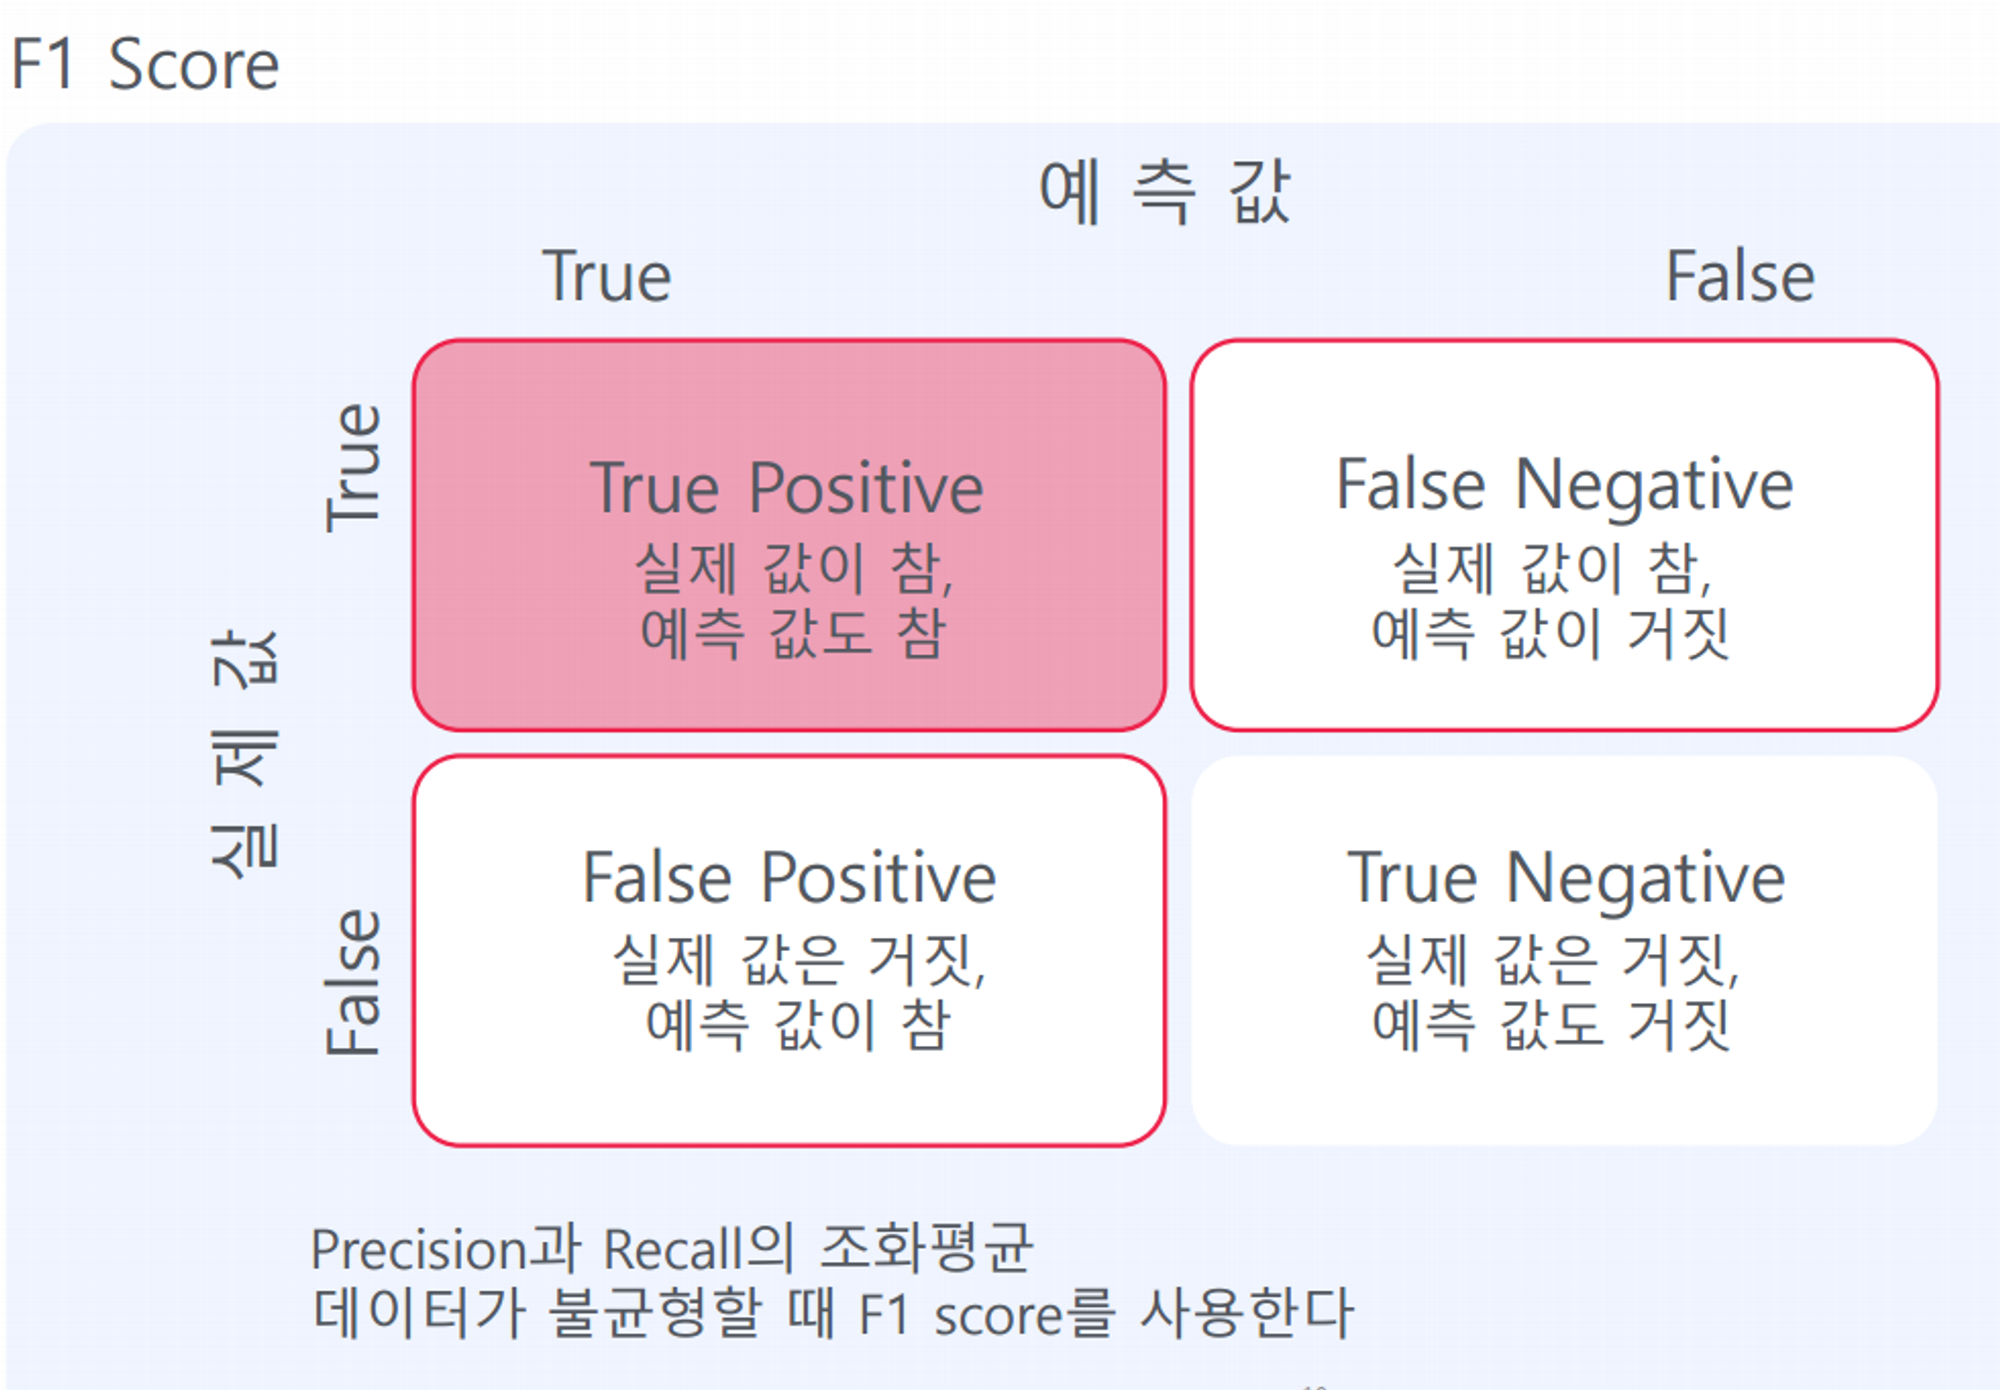

# Packages

In [1]:
#패키지 불러오기
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [29]:
from sklearn.datasets import load_breast_cancer

# Loading the Breast Cancer Wisconsin dataset
breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

# Adding the target variable to the dataframe
breast_cancer_df['target'] = breast_cancer_data.target

breast_cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [30]:
#good 컬럼이 타겟변수, 나머지 컬럼이 설명변수가 된다
# wine/.iloc[:,:-3] : fixed acidity volatile acidity citric acid residual sugar
# chlorides free sulfurdioxide total sulfur dioxide density PH sulphates alcohol
#total
X = breast_cancer_df.iloc[:,:-1]
y = breast_cancer_df['target']

In [31]:
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [32]:
# Train 데이터와 Test 데이터 나누기
# train, test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #total

In [33]:
# 정규화
# 각 컬럼의 값들이 정규분포를 가지도록 scaling 해 주는 과정
scaler = StandardScaler()

#total
Xt_train = scaler.fit_transform(X_train)
Xt_test = scaler.fit_transform(X_test)

In [39]:
# LogisticRegression()
# total
logt = LogisticRegression(solver='liblinear')
logt.fit(X_train, y_train)
pred_logt = logt.predict(X_test)

print("Accuracy Score: ")
print("Total: {:.2f}".format(accuracy_score(pred_logt,y_test)))

print("classification Report:\n",classification_report(pred_logt,y_test))
print("confusion Matrix:\n",confusion_matrix(pred_logt,y_test))

Accuracy Score: 
Total: 0.96
classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.99      0.95      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

confusion Matrix:
 [[39  1]
 [ 4 70]]


In [37]:
# SVM
#total
svct = SVC()
svct.fit(X_train, y_train)
pred_svct = svct.predict(X_test)

#결과 출력하기
print("Accuracy Score: ")
print("Total: {:.2f}".format(accuracy_score(pred_svct,y_test)))

print("classification Report:\n",classification_report(pred_svct,y_test))
print("confusion Matrix:\n",confusion_matrix(pred_svct,y_test))

Accuracy Score: 
Total: 0.95
classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        37
           1       1.00      0.92      0.96        77

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114

confusion Matrix:
 [[37  0]
 [ 6 71]]


In [40]:
# RandomForest
#total
rfct = RandomForestClassifier()
rfct.fit(X_train, y_train)
pred_rfct = rfct.predict(X_test)

#결과 출력하기
print("Accuracy Score: ")
print("Total: {:.2f}".format(accuracy_score(pred_rfct,y_test)))

print("classification Report:\n",classification_report(pred_rfct,y_test))
print("confusion Matrix:\n",confusion_matrix(pred_rfct,y_test))

Accuracy Score: 
Total: 0.96
classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.99      0.96      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

confusion Matrix:
 [[40  1]
 [ 3 70]]


In [46]:
# 시각화
import pandas as pd
rest = [accuracy_score(pred_logt, y_test), accuracy_score(pred_svct, y_test), accuracy_score(pred_rfct, y_test)]

# DataFrame 생성, 각 요소를 별도의 컬럼으로 지정
df = pd.DataFrame([rest], columns=["Logistic Regression", "SVC", "Random Forest"])

# DataFrame 출력
df

Logistic Regression       SVC  Random Forest
0              0.95614  0.947368       0.964912

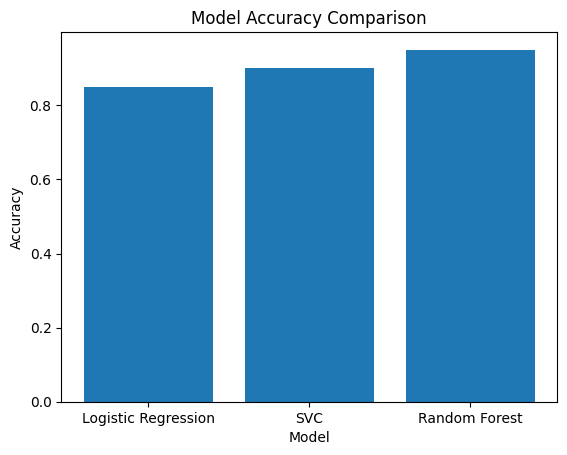

In [51]:
import matplotlib.pyplot as plt

# 예시 데이터프레임 (실제 데이터프레임은 사용자의 데이터에 따라 다름)
df = pd.DataFrame([[0.85, 0.90, 0.95]], columns=["Logistic Regression", "SVC", "Random Forest"])

# 데이터프레임에서 데이터 추출
model_names = df.columns
accuracies = df.iloc[0]

# 막대 그래프 생성
plt.bar(model_names, accuracies)

# 제목과 레이블 추가
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")

# 그래프 표시
plt.show()